In [99]:
import xarray as xr
import hvplot.pandas  # noqa
import hvplot.xarray  # noqa
import cartopy.crs as ccrs
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt


xr.set_options(display_style="html")
%matplotlib inline
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (11, 5)

import seaborn as sns
sns.set()

In [2]:
rain = pd.read_csv('rain_ns.csv')
rain = rain.drop([0, 1,2,3,4,5,6,7,8,9])
rain = rain.reset_index(drop=True)
rain = rain.drop([725,726,727,728,729,730,731,732,733])
rain = rain.reset_index(drop=True)
rain

,time,Year,month,Northern_rain,Southern_rain
0,1960-11-01,1960,11,30.25,29.59
1,1960-12-01,1960,12,78.48,27.30
2,1961-01-01,1961,1,62.17,26.72
3,1961-02-01,1961,2,103.15,25.76
4,1961-03-01,1961,3,33.27,23.20
...,...,...,...,...,...
720,2020-11-01,2020,11,20.33,16.91
721,2020-12-01,2020,12,152.99,45.58
722,2021-01-01,2021,1,110.11,36.04
723,2021-02-01,2021,2,132.25,42.64


In [3]:
index= pd.read_csv('index_m.csv')
index['month'] = pd.DatetimeIndex(index['time']).month
index['year'] = pd.DatetimeIndex(index['time']).year
index

,time,ITCZ,STRI,STRP,HC,month,year
0,1960-11-30,3.201068,101.704796,-33.639680,36.840747,11,1960
1,1960-12-31,-2.022242,101.739845,-37.301601,35.279359,12,1960
2,1961-01-31,-4.591637,101.731680,-36.918149,32.326512,1,1961
3,1961-02-28,-4.911922,101.573220,-36.741103,31.829181,2,1961
4,1961-03-31,-3.138790,101.852776,-37.571174,34.432384,3,1961
...,...,...,...,...,...,...,...
720,2020-11-30,1.895018,101.637245,-32.979537,34.874555,11,2020
721,2020-12-31,1.314057,101.873430,-37.459964,38.774021,12,2020
722,2021-01-31,-4.592527,101.823650,-38.031139,33.438612,1,2021
723,2021-02-28,-6.357651,101.654400,-37.867438,31.509786,2,2021


In [4]:

index_rain  = pd.concat([index, rain.reindex(index.index)], axis=1)
index_rain  = index_rain.loc[:,~index_rain.columns.duplicated()].copy()
index_rain = index_rain.drop('Year', axis=1)
index_rain

,time,ITCZ,STRI,STRP,HC,month,year,Northern_rain,Southern_rain
0,1960-11-30,3.201068,101.704796,-33.639680,36.840747,11,1960,30.25,29.59
1,1960-12-31,-2.022242,101.739845,-37.301601,35.279359,12,1960,78.48,27.30
2,1961-01-31,-4.591637,101.731680,-36.918149,32.326512,1,1961,62.17,26.72
3,1961-02-28,-4.911922,101.573220,-36.741103,31.829181,2,1961,103.15,25.76
4,1961-03-31,-3.138790,101.852776,-37.571174,34.432384,3,1961,33.27,23.20
...,...,...,...,...,...,...,...,...,...
720,2020-11-30,1.895018,101.637245,-32.979537,34.874555,11,2020,20.33,16.91
721,2020-12-31,1.314057,101.873430,-37.459964,38.774021,12,2020,152.99,45.58
722,2021-01-31,-4.592527,101.823650,-38.031139,33.438612,1,2021,110.11,36.04
723,2021-02-28,-6.357651,101.654400,-37.867438,31.509786,2,2021,132.25,42.64


In [5]:
index_rain.dtypes

time              object
ITCZ             float64
STRI             float64
STRP             float64
HC               float64
month              int64
year               int64
Northern_rain    float64
Southern_rain    float64
dtype: object

In [6]:
index_rain = index_rain.astype({"month": 'category', "year": 'str'})
index_rain['decade'] = index_rain.year.str[:3]
index_rain.head()

,time,ITCZ,STRI,STRP,HC,month,year,Northern_rain,Southern_rain,decade
0,1960-11-30,3.201068,101.704796,-33.639680,36.840747,11,1960,30.25,29.59,196
1,1960-12-31,-2.022242,101.739845,-37.301601,35.279359,12,1960,78.48,27.30,196
2,1961-01-31,-4.591637,101.731680,-36.918149,32.326512,1,1961,62.17,26.72,196
3,1961-02-28,-4.911922,101.573220,-36.741103,31.829181,2,1961,103.15,25.76,196
4,1961-03-31,-3.138790,101.852776,-37.571174,34.432384,3,1961,33.27,23.20,196


In [7]:
index_rain['time'] = pd.to_datetime(index_rain['time'])

In [8]:
index_rain.dtypes

time             datetime64[ns]
ITCZ                    float64
STRI                    float64
STRP                    float64
HC                      float64
month                  category
year                     object
Northern_rain           float64
Southern_rain           float64
decade                   object
dtype: object

In [9]:
index_rain.corr()

,ITCZ,STRI,STRP,HC,Northern_rain,Southern_rain
ITCZ,1.000000,0.310514,0.665024,0.776759,-0.689461,-0.204595
STRI,0.310514,1.000000,0.279462,0.179664,-0.483662,-0.226293
STRP,0.665024,0.279462,1.000000,0.046216,-0.687048,-0.164870
HC,0.776759,0.179664,0.046216,1.000000,-0.342816,-0.134625
Northern_rain,-0.689461,-0.483662,-0.687048,-0.342816,1.000000,0.431843
Southern_rain,-0.204595,-0.226293,-0.164870,-0.134625,0.431843,1.000000


<AxesSubplot:>

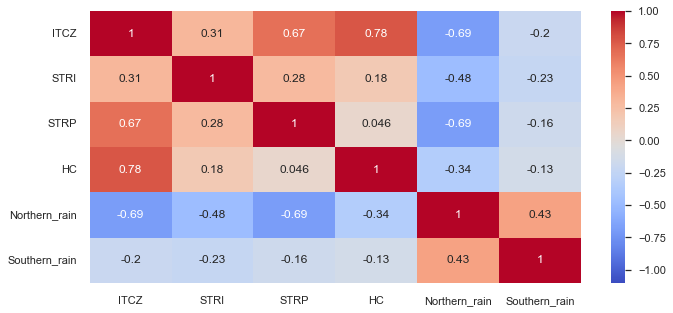

In [10]:
#Correlation plot

sns.heatmap(index_rain.corr(),vmin=1.0, vmax=-1.0,annot=True,cmap="coolwarm")

In [11]:
index_rain.corr(method='spearman')

,ITCZ,STRI,STRP,HC,Northern_rain,Southern_rain
ITCZ,1.000000,0.311986,0.674646,0.785096,-0.740146,-0.167403
STRI,0.311986,1.000000,0.312707,0.160063,-0.569365,-0.223312
STRP,0.674646,0.312707,1.000000,0.087708,-0.780391,-0.144530
HC,0.785096,0.160063,0.087708,1.000000,-0.353200,-0.114990
Northern_rain,-0.740146,-0.569365,-0.780391,-0.353200,1.000000,0.414709
Southern_rain,-0.167403,-0.223312,-0.144530,-0.114990,0.414709,1.000000


<AxesSubplot:>

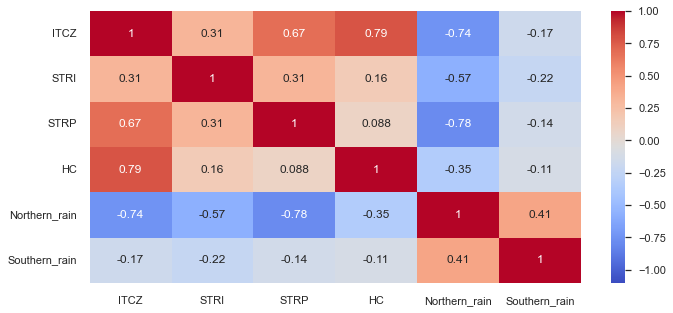

In [12]:
sns.heatmap(index_rain.corr(method='spearman'),vmin=1.0, vmax=-1.0,annot=True,cmap="coolwarm")

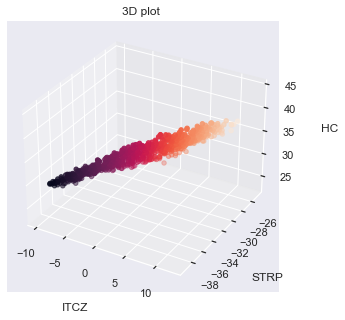

In [13]:

# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')


# defining all 3 axes
z = index_rain['HC']

x = index_rain['ITCZ']
y = index_rain['STRP']


c = x + y
ax.scatter(x, y, z, c = c)    
       
# plotting
ax.set_title('3D plot ')
# Set axes label

ax.set_xlabel('ITCZ', labelpad=20)
ax.set_ylabel('STRP', labelpad=20)
ax.set_zlabel('HC', labelpad=20)

plt.show()

In [14]:
n_au=index_rain['month'].isin([11,12,1,2,3])
n_rain = index_rain[n_au]
n_rain = n_rain.set_index('time') 
n_rain

,ITCZ,STRI,STRP,HC,month,year,Northern_rain,Southern_rain,decade
time,,,,,,,,,
1960-11-30,3.201068,101.704796,-33.639680,36.840747,11,1960,30.25,29.59,196
1960-12-31,-2.022242,101.739845,-37.301601,35.279359,12,1960,78.48,27.30,196
1961-01-31,-4.591637,101.731680,-36.918149,32.326512,1,1961,62.17,26.72,196
1961-02-28,-4.911922,101.573220,-36.741103,31.829181,2,1961,103.15,25.76,196
1961-03-31,-3.138790,101.852776,-37.571174,34.432384,3,1961,33.27,23.20,196
...,...,...,...,...,...,...,...,...,...
2020-11-30,1.895018,101.637245,-32.979537,34.874555,11,2020,20.33,16.91,202
2020-12-31,1.314057,101.873430,-37.459964,38.774021,12,2020,152.99,45.58,202
2021-01-31,-4.592527,101.823650,-38.031139,33.438612,1,2021,110.11,36.04,202


## Northern rain

In [15]:
nor_corr = n_rain.corr(method='spearman')
nor_corr = nor_corr.drop(['Southern_rain'], axis=1)
nor_corr = nor_corr.drop(index='Southern_rain')
nor_corr

,ITCZ,STRI,STRP,HC,Northern_rain
ITCZ,1.000000,-0.160914,0.477191,0.916872,-0.639605
STRI,-0.160914,1.000000,-0.472741,0.035815,-0.058100
STRP,0.477191,-0.472741,1.000000,0.122098,-0.488331
HC,0.916872,0.035815,0.122098,1.000000,-0.514684
Northern_rain,-0.639605,-0.058100,-0.488331,-0.514684,1.000000


<AxesSubplot:>

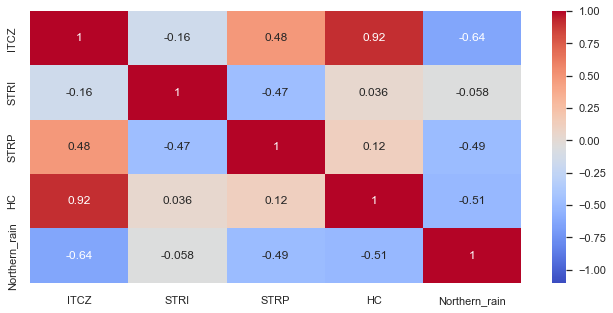

In [16]:
sns.heatmap(nor_corr,vmin=1.0, vmax=-1.0,annot=True,cmap="coolwarm" )

In [107]:
ITCZ_n =n_rain['ITCZ'].resample("BAS-JUL").mean();


In [105]:
from matplotlib.lines import Line2D
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

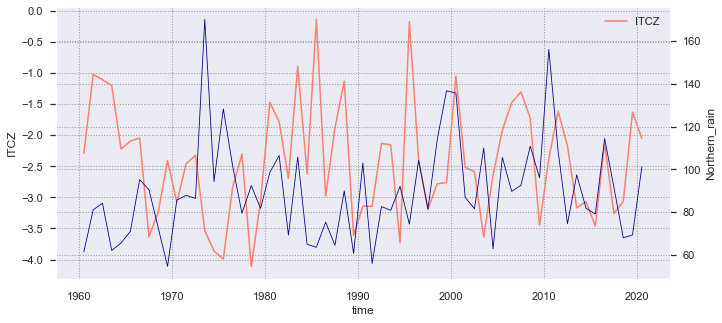

In [113]:
ITCZ_n = n_rain['ITCZ'].resample("BAS-JUL").mean()
rain_n = n_rain['Northern_rain'].resample("BAS-JUL").mean()

fig = sns.lineplot(data=ITCZ_n, color="salmon",lw=1.5)
sns.lineplot(data=rain_n, color="navy",lw=0.8, ax=fig.axes.twinx())

fig.legendhandles=([Line2D([], [], marker='_',  label='rain'), 
                    Line2D([], [], marker='_', label='ITCZ')]);

fig.legend(['ITCZ']);


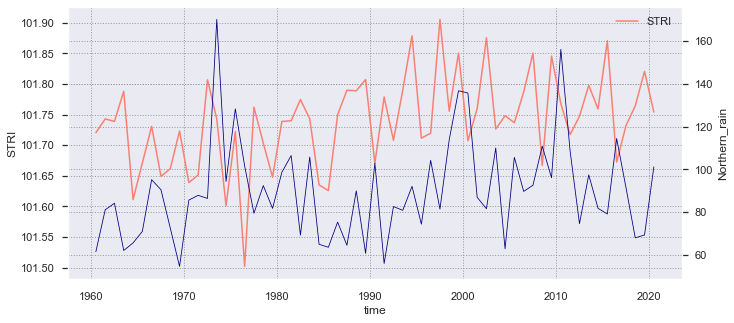

In [115]:
STRI_n =n_rain['STRI'].resample("BAS-JUL").mean();
rain_n = n_rain['Northern_rain'].resample("BAS-JUL").mean()

fig = sns.lineplot(data=STRI_n, color="salmon",lw=1.5)
sns.lineplot(data=rain_n, color="navy",lw=0.8, ax=fig.axes.twinx())

fig.legendhandles=([Line2D([], [], marker='_', label='rain'), 
                    Line2D([], [], marker='_', label='STRI')]);

fig.legend(['STRI']);


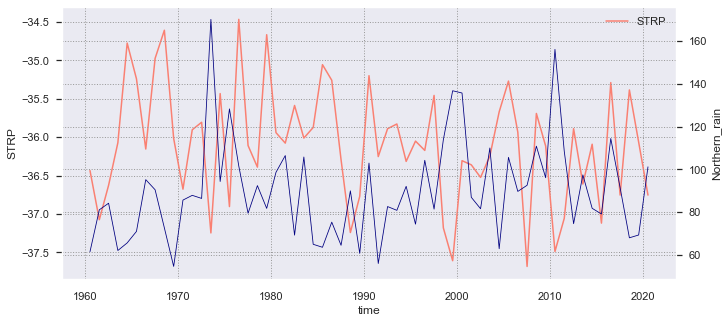

In [117]:

STRP_n =n_rain['STRP'].resample("BAS-JUL").mean();
rain_n = n_rain['Northern_rain'].resample("BAS-JUL").mean()

fig = sns.lineplot(data=STRP_n, color="salmon",lw=1.5)
sns.lineplot(data=rain_n, color="navy",lw=0.8, ax=fig.axes.twinx())

fig.legendhandles=([Line2D([], [], marker='_', label='rain'), 
                    Line2D([], [], marker='_', label='STRP')]);

fig.legend(['STRP']);


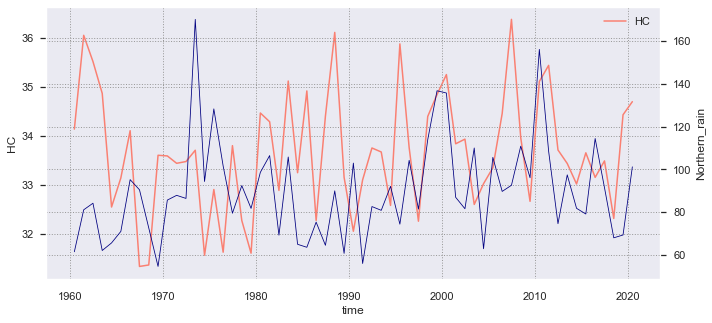

In [119]:

HC_n =n_rain['HC'].resample("BAS-JUL").mean();
rain_n = n_rain['Northern_rain'].resample("BAS-JUL").mean()

fig = sns.lineplot(data= HC_n, color="salmon",lw=1.5)
sns.lineplot(data=rain_n, color="navy",lw=0.8, ax=fig.axes.twinx())

fig.legendhandles=([Line2D([], [], marker='_', label='rain'), 
                    Line2D([], [], marker='_', label='HC')]);

fig.legend(['HC']);

In [136]:
ITCZ_n = n_rain['ITCZ'].resample("BAS-JUL").mean()
ITCZ_n = pd.DataFrame (ITCZ_n, columns = ['ITCZ'])

HC_n =n_rain['HC'].resample("BAS-JUL").mean();
HC_n = pd.DataFrame (HC_n, columns = ['HC'])

HC_ITCZ_N  = pd.concat([ITCZ_n, HC_n.reindex(HC_n.index)], axis=1)

<AxesSubplot:xlabel='ITCZ', ylabel='HC'>

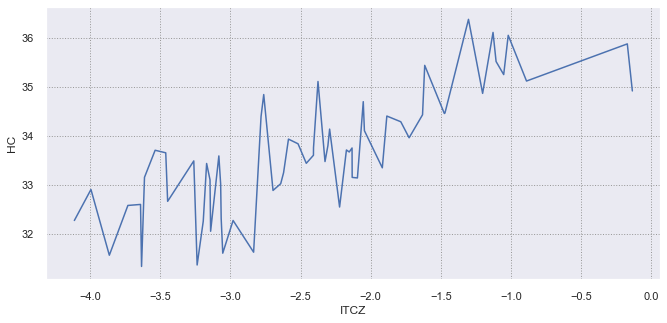

In [142]:
 sns.lineplot(data=HC_ITCZ_N , x="ITCZ", y="HC")

<AxesSubplot:xlabel='time'>

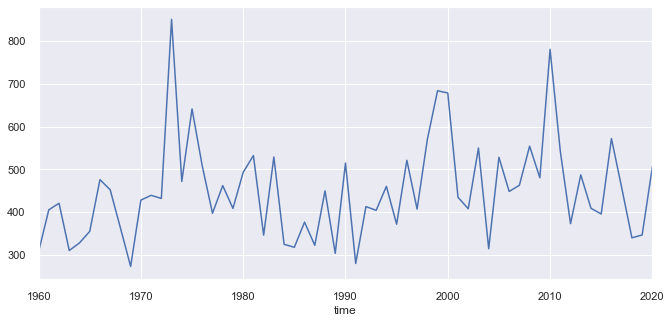

In [21]:
rain_n =n_rain['Northern_rain'].resample("BAS-JUL").sum();
rain_n.plot()

In [49]:
s_au=index_rain['month'].isin([4,5,6,7,8,9,10])
s_rain = index_rain[s_au]
s_rain = s_rain.set_index('time') 
s_rain 

,ITCZ,STRI,STRP,HC,month,year,Northern_rain,Southern_rain,decade
time,,,,,,,,,
1961-04-30,-3.254448,101.900314,-34.417260,31.162811,4,1961,28.37,52.60,196
1961-05-31,8.779359,102.146080,-31.712633,40.491993,5,1961,5.01,12.37,196
1961-06-30,4.068505,101.930930,-28.287367,32.355872,6,1961,3.58,29.01,196
1961-07-31,7.580071,102.026510,-28.888790,36.468861,7,1961,4.79,32.17,196
1961-08-31,8.813167,101.947710,-30.216192,39.029359,8,1961,2.21,25.96,196
...,...,...,...,...,...,...,...,...,...
2020-06-30,0.360320,102.178030,-29.516014,29.876335,6,2020,3.12,19.30,202
2020-07-31,-0.152135,102.225270,-30.581851,30.429715,7,2020,3.11,23.00,202
2020-08-31,5.987544,101.842620,-28.979537,34.967082,8,2020,5.42,37.06,202


<AxesSubplot:>

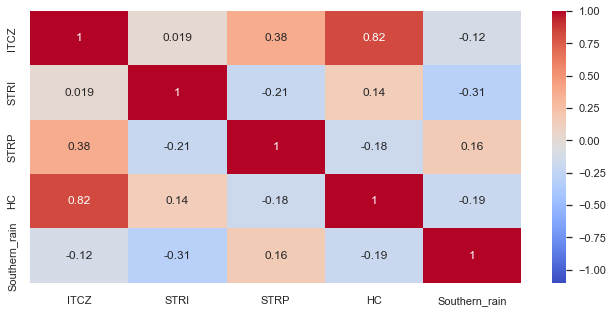

In [50]:
sou_corr = s_rain.corr(method='spearman')
sou_corr = sou_corr.drop(['Northern_rain'], axis=1)
sou_corr = sou_corr.drop(index='Northern_rain')
sns.heatmap(sou_corr,vmin=1.0, vmax=-1.0,annot=True,cmap="coolwarm" )

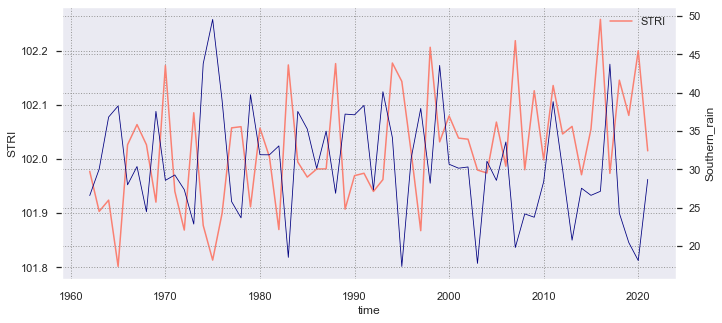

In [123]:

STRI_s =s_rain['STRI'].resample("A").mean();
rain_s = s_rain['Southern_rain'].resample("A").mean()

fig = sns.lineplot(data= STRI_s, color="salmon",lw=1.5)
sns.lineplot(data=rain_s, color="navy",lw=0.8, ax=fig.axes.twinx())

fig.legendhandles=([Line2D([], [], marker='_', label='rain'), 
                    Line2D([], [], marker='_', label='STRI')]);

fig.legend(['STRI']);

In [143]:
ITCZ_s = s_rain['ITCZ'].resample("A").mean()
ITCZ_s = pd.DataFrame (ITCZ_s, columns = ['ITCZ'])

HC_s =s_rain['HC'].resample("A").mean();
HC_s = pd.DataFrame (HC_s, columns = ['HC'])

HC_ITCZ_S  = pd.concat([ITCZ_s, HC_s.reindex(HC_s.index)], axis=1)

<AxesSubplot:xlabel='ITCZ', ylabel='HC'>

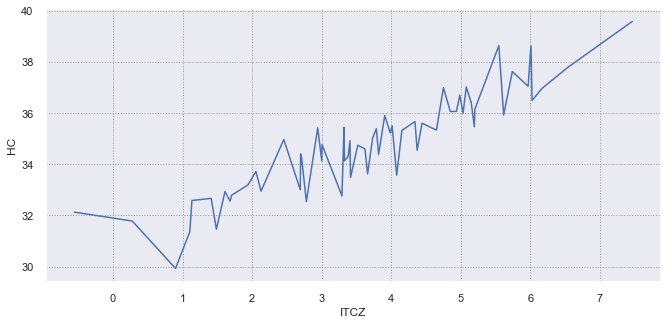

In [144]:
sns.lineplot(data=HC_ITCZ_S , x="ITCZ", y="HC")

In [120]:
ITCZ_s =s_rain['ITCZ'].resample("A").mean();


In [126]:
STRI_s =s_rain['STRI'].resample("A").mean();


In [125]:
STRP_s =s_rain['STRP'].resample("A").mean();


In [124]:
HC_s =s_rain['HC'].resample("A").mean();


In [127]:
rain_s =s_rain['Southern_rain'].resample("A").sum();


## Principle Component Analysis (PCA)

In [38]:

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [39]:
index_rain.head()

,time,ITCZ,STRI,STRP,HC,month,year,Northern_rain,Southern_rain,decade
0,1960-11-30,3.201068,101.704796,-33.639680,36.840747,11,1960,30.25,29.59,196
1,1960-12-31,-2.022242,101.739845,-37.301601,35.279359,12,1960,78.48,27.30,196
2,1961-01-31,-4.591637,101.731680,-36.918149,32.326512,1,1961,62.17,26.72,196
3,1961-02-28,-4.911922,101.573220,-36.741103,31.829181,2,1961,103.15,25.76,196
4,1961-03-31,-3.138790,101.852776,-37.571174,34.432384,3,1961,33.27,23.20,196


In [40]:
features = ['ITCZ', 'STRI', 'STRP', 'HC', 'Northern_rain', 'Southern_rain']
x = index_rain.loc[:, features].values
y = index_rain.loc[:,['decade']].values

In [41]:
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,ITCZ,STRI,STRP,HC,Northern_rain,Southern_rain
0,0.398165,-0.857757,-0.124080,0.637213,-0.308571,-0.203094
1,-0.592250,-0.704888,-1.225402,0.241208,0.631424,-0.362702
2,-1.079444,-0.740501,-1.110079,-0.507704,0.313545,-0.403126
3,-1.140175,-1.431636,-1.056832,-0.633839,1.112239,-0.470036
4,-0.803963,-0.212331,-1.306476,0.026395,-0.249711,-0.648461


In [42]:
# PCA Projection to 2D

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-0.309646,0.748199
1,1.199088,0.526469
2,1.500798,-0.283707
3,2.167954,-0.049092
4,0.734360,-0.130614


In [43]:
finalDf = pd.concat([principalDf, index_rain[['decade']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,decade
0,-0.309646,0.748199,196
1,1.199088,0.526469,196
2,1.500798,-0.283707,196
3,2.167954,-0.049092,196
4,0.734360,-0.130614,196


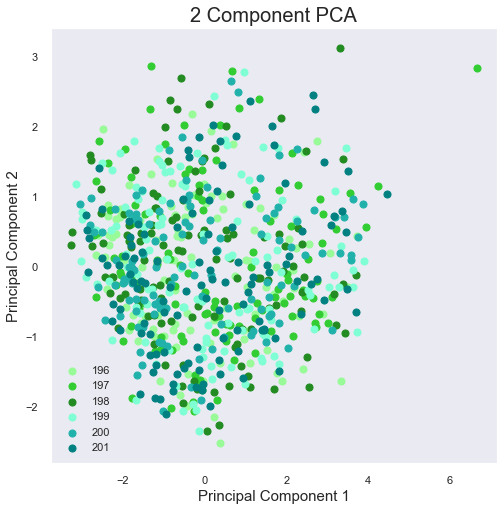

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['196', '197', '198', '199', '200', '201']
colors = ['palegreen', 'limegreen', 'forestgreen', 'aquamarine', 'lightseagreen', 'teal']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['decade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

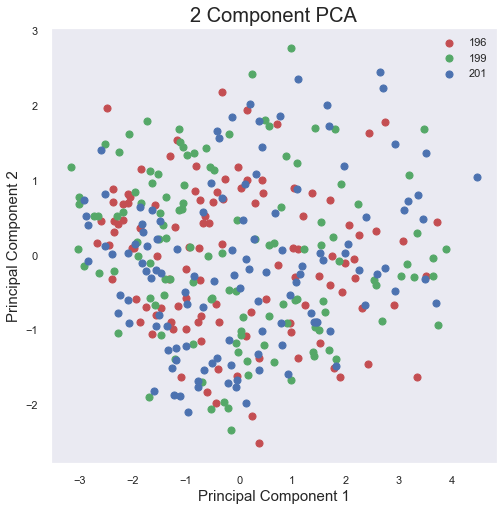

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['196', '199', '201']
colors = [ 'r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['decade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [46]:
pca.explained_variance_ratio_

array([0.50252736, 0.18516062])